In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
df = pd.read_csv('cars.csv')


In [9]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [4]:
df.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [5]:
df.shape

(4340, 8)

In [6]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


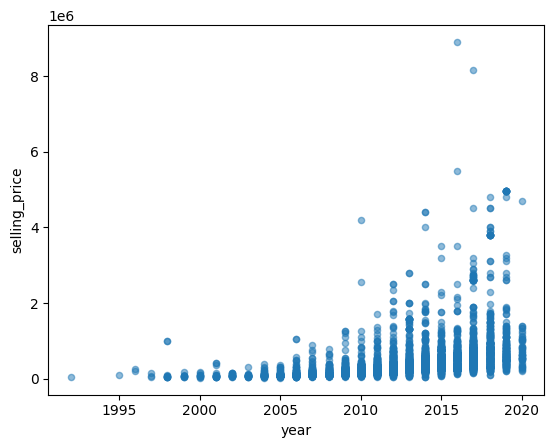

In [4]:
df.plot.scatter(x='year',y='selling_price', alpha = 0.5)
plt.show()

In [40]:
df.drop(columns=['name'], inplace=True)


In [16]:
df.head()

,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [27]:
df['fuel'].value_counts()

fuel
Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: count, dtype: int64

In [30]:
ohe = OneHotEncoder(sparse_output=False, dtype='int')
encoded = ohe.fit_transform(df[['fuel']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['fuel']))
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

In [38]:
df.drop(columns=['fuel'],inplace=True)

In [41]:
df.head(2)

,year,selling_price,km_driven,seller_type,transmission,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol
0,2007,60000,70000,Individual,Manual,First Owner,0,0,0,0,1
1,2007,135000,50000,Individual,Manual,First Owner,0,0,0,0,1


In [42]:
df['owner'].value_counts()

owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

In [43]:
encoded = ohe.fit_transform(df[['owner']])
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(['owner']))
df = pd.concat([df.reset_index(drop=True), encoded_df], axis=1)

In [ ]:
df.drop

,year,selling_price,km_driven,seller_type,transmission,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,2007,60000,70000,Individual,Manual,First Owner,0,0,0,0,1,1,0,0,0,0
1,2007,135000,50000,Individual,Manual,First Owner,0,0,0,0,1,1,0,0,0,0
